<center>
    <a href = "https://github.com/brndnaxr"><img src="https://64.media.tumblr.com/de70f81b2d149064c8714864244d6e20/649c99e42a5c377a-49/s400x600/8bcb986589d9e2974995f94329239137f956e333.png" width="100" alt="Error 404"/></a>
</center>

# **Cost Optimization** at Rossmann Store

### **Predicting Revenue** from Sales

**Benefits**

Forecasted revenue is calculated by taking the [**average selling price (ASP)**](https://www.investopedia.com/terms/a/averagesellingprice.asp) for future periods and multiplying that by the number of expected units sold. This strategy will maximize company's profit. From these models, analysts can then compare earnings growth to revenue growth to see how well **the company is able to manage costs and bring [revenue growth](https://www.investopedia.com/articles/active-trading/022315/stock-analysis-forecasting-revenue-and-growth.asp) to the bottom line**.

![](https://cdn.dribbble.com/users/124813/screenshots/5336064/594-man-telescope-floydworx.png)

<center><strong>Source:</strong> Photo by <a href="https://dribbble.com/shots/5336064/attachments/5336064-Man-with-telescope?mode=media">Csaba Gyulai</a> on <a href="https://dribbble.com/">Dribbble</a></center> 

<hr>

# Table of Contents


* [Business Understanding](#ch1)
* [Analytic Approach](#ch2)
* [Data Understanding](#ch3)
* [Data Preparation](#ch4)
* [Feature Engineering](#ch5)
* [Time Series Modeling](#ch6)
* [Feature Selection](#ch7)
* [Evaluation](#ch8)
* [Deployment](#ch9)
* [Feedback](#ch10)


<hr>

# Business Understanding <a id="ch1"></a>

**Why Business Forecasting Is So Important?**

Appropriately used, [forecasting allows businesses](https://www.investopedia.com/articles/financial-theory/11/basics-business-forcasting.asp) to plan ahead for their needs, raising their chances of staying competitive in the markets
* Forecasting is valuable to businesses so that they can make informed business decisions.
* Financial forecasts are fundamentally informed guesses, and there are risks involved in relying on past data and methods that cannot include certain variables.
* Forecasting approaches include qualitative models and quantitative models.

**About the company**

Rossmann operates over 3,000 drug stores in 7 European countries. Currently, [Rossmann Store](https://www.kaggle.com/c/rossmann-store-sales/overview/description) managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

**KEY TAKEAWAYS:**

* Forecasting is valuable to businesses so that they can make informed business decisions.
* [Financial forecasts](https://www.investopedia.com/articles/financial-theory/11/basics-business-forcasting.asp) are fundamentally informed guesses, and there are risks involved in relying on past data and methods that cannot include certain variables.
* Forecasting approaches include qualitative models and quantitative models.

# Analytic Approach <a id="ch2"></a>

> This notebook takes a **Time Series Approach**. In which **4 models** were applied. Likewise, this project also has a **scope focused** on **time series modeling.** As you expect, at the end, we will address the financial motivations involved in the project, as well as its translation into a financial result.

# Data Understanding <a id="ch3"></a>

## Data Collection <a id="ch3.1"></a>

We have downloaded the data through the link below. Accessed Aug. 2021.

> **Source:** https://www.kaggle.com/c/rossmann-store-sales/data

## Dataset Preview <a id="ch3.2"></a>

In [1]:
### import 'read in data' library
import pandas as pd

### set path for reading
path = r'D:/jupyter/datasets/rossmann-store-sales/' 

### reading files
train_raw = pd.read_csv(path + 'train.csv', low_memory=False)
test_raw = pd.read_csv(path + 'test.csv', low_memory=False)
store_raw = pd.read_csv(path + 'store.csv', low_memory=False)

**Preview** the **first dataset**, i.e. ``train.csv``

In [2]:
### "train.csv" - preview the first dataset
train_raw.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


If we manually write what outputs we expect in the data types, it will save us a lot of time down the road.

DTEXPCT01: Data type we **expect** for each column:

| Column               | dtype       |  
| -------------------- | ---------   |
|**Store**             |  int64      | 
|**DayOfWeek**         |  int64      | 
|**Date**              |  datetime   |
|**Sales**             |  int64      |
|**Customers**         |  int64      | 
|**Open**              |  int64      |
|**Promo**             |  int64      |
|**StateHoliday**      |  object     |
|**SchoolHoliday**     |  int64      |

**Preview** the **second dataset**, i.e. ``test.csv``

In [ ]:
### 'test.csv'
test_raw.head(10)

**Preview** the **third dataset**, i.e. ``store.csv``

In [ ]:
### "store.csv"
store_raw.head(10)

DTEXPCT03: Data type we **expect** for each column:

| Column               | dtype       |  
| -------------------- | ---------   |
|**Store**             |  int64      | 
|**StoreType**         |  object     | 
|**Assortment**              |  object     |
|**CompetitionDistance**         |  float64      |
|**CompetitionOpenSinceMonth**     |  int64      | 
|**CompetitionOpenSinceYear**     |  int64      |
|**Promo2**             |  int64      |
|**Promo2SinceWeek**      |  int64      |
|**Promo2SinceYear**     |  int64      |
|**PromoInterval**     |  object      |

In [ ]:
### data shape
shape_v1 = train_raw.shape
print('The dataframe "train.csv" has:')
print(f'{shape_v1[0]} rows')
print(f'{shape_v1[1]} columns')

In [ ]:
### data shape
shape_v2 = store_raw.shape
print('The dataframe "store.csv" has:')
print(f'{shape_v2[0]} rows')
print(f'{shape_v2[1]} columns')

## Data Description <a id="ch3.3"></a>

| Column Variable | What it means  |  
| -------------------- | -------------------- |
|**Id**            | an Id that represents a (Store, Date) duple within the test set       |
|**Store**            | a unique Id for each store              | 
|**DayOfWeek**            | days of the week, e.g. monday = 1, sunday = 7              | 
|**Sales**            |the turnover for any given day **(this is what we are predicting)**          |
|**Customers**            |   the number of customers on a given day                 | 
|**Open**         |an indicator for whether the store was open: 0 = closed, 1 = open |
|**StateHoliday**         | indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None         |
|**SchoolHoliday**         |  indicates if the (Store, Date) was affected by the closure of public schools       |
|**StoreType**         |  differentiates between 4 different store models: a, b, c, d    |
|**Assortment**            |  describes an assortment level: a = basic, b = extra, c = extended        |
|**CompetitionDistance**         |    distance in meters to the nearest competitor store      |
|**CompetitionOpenSince[Month/Year]** |   gives the approximate year and month of the time the nearest competitor was opened    |
|**Promo**            |  indicates whether a store is running a promo on that day         |
|**Promo2**            |   Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating  |
|**Promo2Since[Year/Week]**   | describes the year and calendar week when the store started participating in Promo2     |
|**PromoInterval**    | describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store    |

# Data Preparation <a id="ch4"></a>

* **1. Quais são os tipos de variáveis?**
* **2. Qual o formato/tamanho do nosso dataset?**
* **3. Tratar valores nulos e vazios** (pode ser parte do fenômeno)
* **4. Remover outliers** (pode ser parte do fenômeno)
* **5. Remover dados duplicados** (pode ser parte do fenômeno)
* **6. Unificar valores como (FEM, Feminino, F, ...)**
* **7. Tratar valores fora de domínio** (idade negativa, etc)
* **8. Tratar valores fora de sentido** (*Aparência do dia*: sol, nublado, chuva, **menos** $\leftarrow$ erro)

## Data Wrangling

## Cleaning Stages<a id="ch4.1"></a>

* **Step 0.** Setting another dataset just for manipulation
* **Step 1.** Checking data types
* **Step 2.** Cheking missing values
* **Step 3.** Filling in missing values
* **Step 4.** Adjusting data types
* **Step 5.** Basic feature engineering

### Imports

In [ ]:
import warnings
import datetime

import pandas as pd
import numpy  as np

import seaborn as sns
import matplotlib.pyplot as plt

# import plotly.express        as px
# import plotly.graph_objects  as go
# import plotly.offline as pyoff

from datetime import datetime

# from statsmodels.distributions.empirical_distribution import ECDF
# from statsmodels.tsa.seasonal import seasonal_decompose
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# from IPython.display import display, HTML, display_html

### Helper Functions

In [ ]:
### compute the metrics

def calculate_mape(y_true, y_pred):
    """ Calculate mean absolute percentage error (MAPE)"""
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def calculate_mpe(y_true, y_pred):
    """ Calculate mean percentage error (MPE)"""
    return np.mean((y_true - y_pred) / y_true) * 100

def calculate_mae(y_true, y_pred):
    """ Calculate mean absolute error (MAE)"""
    return np.mean(np.abs(y_true - y_pred)) * 100

def calculate_rmse(y_true, y_pred):
    """ Calculate root mean square error (RMSE)"""
    return np.sqrt(np.mean((y_true - y_pred)**2))

In [ ]:
### print report error

def print_error_metrics(y_true, y_pred):
    print('MAPE: %f'%calculate_mape(y_true, y_pred))
    print('MPE: %f'%calculate_mpe(y_true, y_pred))
    print('MAE: %f'%calculate_mae(y_true, y_pred))
    print('RMSE: %f'%calculate_rmse(y_true, y_pred))
    return

In [ ]:
### return dataframe

def model_error( model_name, y, yhat ):
    mae = mean_absolute_error( y, yhat )
    mape = mean_absolute_percentage_error( y, yhat )
    rmse = np.sqrt( mean_squared_error( y, yhat ) )
    
    return pd.DataFrame( { 'Model Name': model_name, 
                           'MAE': mae, 
                           'MAPE': mape,
                           'RMSE': rmse }, index=[0] )

In [ ]:
### jupyter settings configuration

def jupyter_settings():
    %matplotlib inline

    pd.set_option('display.float_format', lambda x: '%.3f' % x)
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None

    warnings.filterwarnings("ignore", category=DeprecationWarning)
    warnings.filterwarnings("ignore", category=UserWarning)
    warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
### additional calculation

def days_between(d1, d2):
    """ Calculate the number of days between two dates. 
       D1 is start date (inclusive) and d2 is end date
       (inclusive) as well """
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    delta = d2 - d1

    return abs(delta.days + 1)

In [ ]:
### function: 'days_between(d1, d2)' 
### an example to illustrate usage

start_date = '2021-08-18'  # start date
end_date = '2022-02-15'    # end date

### applying function
days_between(start_date, end_date) 

**Activating environment**

In [ ]:
jupyter_settings()

### **Step 0.** Setting another dataset just for manipulation

In [ ]:
### setting another dataset for integrity and cleansing
train = train_raw.copy()
store = store_raw.copy()

### **Step 1.** Checking data ``types``

In [ ]:
train.dtypes

Recalling data types we expect for each column.

| Column               | dtype       |  
| -------------------- | ---------   |
|**Store**             |  int64      | 
|**DayOfWeek**         |  int64      | 
|**Date**              |  datetime   |
|**Sales**             |  int64      |
|**Customers**         |  int64      | 
|**Open**              |  int64      |
|**Promo**             |  int64      |
|**StateHoliday**      |  object     |
|**SchoolHoliday**     |  int64      |

TSK001: it is necessary to convert ``Date`` variable type

In [ ]:
store.dtypes

Recalling data types we expect for each column.

| Column               | dtype       |  
| -------------------- | ---------   |
|**Store**             |  int64      | 
|**StoreType**         |  object     | 
|**Assortment**              |  object     |
|**CompetitionDistance**         |  float64      |
|**CompetitionOpenSinceMonth**     |  int64      | 
|**CompetitionOpenSinceYear**     |  int64      |
|**Promo2**             |  int64      |
|**Promo2SinceWeek**      |  int64      |
|**Promo2SinceYear**     |  int64      |
|**PromoInterval**     |  object      |

TSK002: it is necessary to convert ``Competition`` and ``Promo`` variable type. More specifically:
* ``CompetitionOpenSinceMonth``
* ``CompetitionOpenSinceYear``
* ``Promo2SinceWeek``
* ``Promo2SinceYear``

### **Step 2.** Cheking ``missing`` values

**Exploration stage first**

In [ ]:
train.isnull().sum()

In [ ]:
store.isnull().sum()

And what about zero sales, is it only due to the fact that the store is closed? Let's check that.

Closed stores and zero sales

In [ ]:
train[(train.Open == 0) & (train.Sales == 0)].head()

Only closed stores and only opened stores

In [ ]:
closed_sales_train_df = train[train['Open'] == 0]
open_sales_train_df = train[train['Open'] == 1]

### how many stores were closed and opened
print(f'The data has {len(closed_sales_train_df)} closed stores.')
print(f'The data has {len(open_sales_train_df)} opened stores.')

There're 172817 closed stores in the data. It is about 10% of the total amount of observations. To avoid any biased forecasts we will drop these values.

What about opened stores with zero sales?

In [ ]:
# opened stores with zero sales
zero_sales = train[(train.Open != 0) & (train.Sales == 0)]
print("In total: ", zero_sales.shape)
zero_sales.head(5)

Interestingly enough, there are opened store with **no sales on working days.** There're only 54 days in the data, so we can assume that there were external factors involved, e.g. manifestations.

What about those missing values? It is important to understand the nature of the phenomenon that caused those missing values.

In [ ]:
# missing values in CompetitionDistance
store[pd.isnull(store.CompetitionDistance)]

Apperently this information is simply missing from the data. No particular pattern observed. In this case, it makes a complete sense to replace NaN with the median values (which is twice less that the average).

### **Step 3.** Filling in ``missing`` values

Either there is no competition close or the competitor is too far away. Therefore, we will fill null values in ``CompetitionDistance`` with the **median**.

**Filling in stage now**

In [ ]:
# fill NaN with a median value (skewed distribuion)
store['CompetitionDistance'].fillna(store['CompetitionDistance'].median(), inplace = True)

Continuing further with missing data. What about ``Promo2SinceWeek``? May it be that we observe unsusual data points?

In [ ]:
# no promo = no information about the promo?
_ = store[pd.isnull(store.Promo2SinceWeek)]
_[_.Promo2 != 0].shape

No, if there's no ``Promo2`` then there's no information about it. We can **replace these values by zeros**. The same goes for tha variables deducted from the competition, ``CompetitionOpenSinceMonth`` and ``CompetitionOpenSinceYear``.

In [ ]:
# replace NA's by 0
store.fillna(0, inplace = True)

Before we keep moving, we need to check if these adjustments worked well.

**Checking results**

In [ ]:
store.isnull().sum()

### **Step 4.** Adjusting data ``types``

TSK001: converting ``Date`` column type

In [ ]:
### basic adjustment on data type 'object' to 'datetime'
train['Date'] = pd.to_datetime(train['Date'])
train.dtypes

TSK002: converting ``Competition`` and ``Promo`` columns type

In [ ]:
### for 'Competition' columns
store['CompetitionOpenSinceMonth'] = store['CompetitionOpenSinceMonth'].astype(np.int64)
store['CompetitionOpenSinceYear'] = store['CompetitionOpenSinceYear'].astype(np.int64)

#### for 'Promo' columns
store['Promo2SinceWeek'] = store['Promo2SinceWeek'].astype(np.int64)
store['Promo2SinceYear'] = store['Promo2SinceYear'].astype(np.int64)

store.dtypes

### **Step 5.** Basic feature engineering

**Merged dataframe:** ``train_store``

By specifying inner join we make sure that only those observations that are present in both train and store sets are merged together.

In [ ]:
train_store = pd.merge(train, store, how = 'inner', on = 'Store')

We are dealing with time series data so it will probably serve us to extract dates for further analysis. We also have two likely correlated vaiables in the dataset, which can be combined into a new feature.

**Create ``Year``, ``Month`` and ``Day`` columns to ``train`` set**

In [ ]:
# upgrading model's predictive power with new variables
train['Year'] = train['Date'].dt.year
train['Month'] = train['Date'].dt.month
train['Day'] = train['Date'].dt.day
train['WeekOfYear'] = train['Date'].dt.weekofyear

train.head(2) # viewing new columns

Note the new columns in the upper right corner.

**Create ``Year``, ``Month`` and ``Day`` columns to ``train_store`` set**

In [ ]:
train_store['Year'] = pd.DatetimeIndex(train_store['Date']).year
train_store['Month'] = pd.DatetimeIndex(train_store['Date']).month
train_store['Day'] = pd.DatetimeIndex(train_store['Date']).day
train_store['WeekOfYear'] = pd.DatetimeIndex(train_store['Date']).weekofyear

train_store.head(2)

Note the new columns in the upper right corner.

Now, it makes no sense to work with data from the days when stores were closed. Therefore, as part of the process, it will be good practice to eliminate these data points from our dataset.

**How many days the stores were open and closed**

In [ ]:
### setting variables for openend and closed days
closed_days_stores = train_store[train_store['Open'] == 0]
opened_days_stores = train_store[train_store['Open'] == 1]

### print what we just did
print(f'The stores were closed for: {len(closed_days_stores)} days')
print(f'The stores were open for: {len(opened_days_stores)} days')

This last output (i.e. 844392 days) is what will be captured now.

**Removing *zero sales* and *closed days*  in ``train_store``**

In [ ]:
train_store = train_store[(train_store['Open'] == 1) & (train_store['Sales'] != 0)]
print(f'Now, the train_store set has: {train_store.shape[0]} rows')
train_store.head(2)

Now, the train_store set has only open days rows. For this reason, it makes sense to remove the ``Open`` column once it no longer makes difference - since all values are now equal to ``1``.

In [ ]:
### remove 'open' column, it's 1 for every row
train_store.drop(['Open'], axis = 1, inplace = True);
train_store.head(2) # see if that worked

## Data Analysis

**Numerical Variables Analysis**

In [ ]:
axis = train_store.groupby('Month')[['Sales']].mean().plot(figsize=(20,5), marker = 'o')
axis.set_title('Average sales by month');

In [ ]:
axis = train_store.groupby('Month')[['Customers']].mean().plot(figsize=(20,5), marker = '^')
axis.set_title('Average customers by month');

In [ ]:
axis = train_store.groupby('Day')[['Sales']].mean().plot(figsize=(20,5), marker = 'o')
axis.set_title('Average sales by day');

In [ ]:
axis = train_store.groupby('Day')[['Customers']].mean().plot(figsize=(20,5), marker = '^')
axis.set_title('Average customers by day');

In [ ]:
axis = train_store.groupby('DayOfWeek')[['Sales']].mean().plot(figsize=(20,5), marker = 'o')
axis.set_title('Average sales by day of the week');

In [ ]:
# fig, ax = plt.subplots(figsize=(20,7))
# train_store.groupby(['Date', 'StoreType']).mean()['Sales'].unstack().plot(ax = ax);
# plt.title('Average Sales by Store Type');

**Store types investigation**

In this section we will closely look at different levels of ``StoreType`` and how the main metric ``Sales`` is distributed among them.

In [ ]:
# Initialize the figure with a linear x axis
f, ax = plt.subplots(figsize=(20, 6))
ax.set_xscale("linear")

# Plot the boxplot here
sns.boxplot(x="Sales", y="StoreType", data=train_store,
            whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x="Sales", y="StoreType", data=train_store,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

**Brief Descriptive Statistics**

In [ ]:
train_store.groupby('StoreType')['Sales'].describe().style.background_gradient(cmap='Blues')

**Highlight in red negative values**

In [ ]:
# Define a function which 
# returns the list for 
# df.style.apply() method
def highlight_max(s):
    if s.dtype == np.object:
        is_neg = [False for _ in range(s.shape[0])]
    else:
        is_neg = s < 0
    return ['background: red; color:white' 
            if cell else 'background:black; color:white' 
            for cell in is_neg]
  
# Using apply method of style 
# attribute of Pandas DataFrame
df = train_store.groupby('StoreType')['Sales'].describe()
df.style.apply(highlight_max)

``StoreType`` B has the **highest average of ``Sales``** among all others, however we have much less data for it. So let's print an overall sum of ``Sales`` and ``Customers`` to answer the following question:
* Which ``StoreType`` is the most selling and crowded one?

In [ ]:
train_store.groupby('StoreType')['Customers', 'Sales'].sum().style.background_gradient(cmap='Blues')

**Clearly stores of type A.** StoreType D goes on the second place in both Sales and Customers.

**Categorical Variables Analysis**

In [ ]:
# sales trends
sns.factorplot(data = train_store, x = 'Month', y = "Sales", 
               col = 'StoreType', # per store type in cols
               palette = 'Blues_r',
               hue = 'StoreType',
               row = 'Promo');

In [ ]:
# sales trends
sns.factorplot(data = train_store, x = 'Month', y = "Customers", 
               col = 'StoreType', # per store type in cols
               palette = 'Blues_r',
               hue = 'StoreType',
               row = 'Promo');

**Already at this point, we can see that Sales escalate towards Christmas holidays. But we'll talk about seasonalities and trends later in the Time Series Analysis section.**

To complete our preliminary data analysis, we can add variables describing the period of time during which competition and promotion were opened:

In [ ]:
# competition open time (in months)
train_store['CompetitionOpen'] = 12 * (train_store.Year - train_store.CompetitionOpenSinceYear) + \
        (train_store.Month - train_store.CompetitionOpenSinceMonth)
    
# Promo open time
train_store['PromoOpen'] = 12 * (train_store.Year - train_store.Promo2SinceYear) + \
        (train_store.WeekOfYear - train_store.Promo2SinceWeek) / 4.0

# replace NA's by 0
train_store.fillna(0, inplace = True)

# average PromoOpen time and CompetitionOpen time per store type
train_store.loc[:, ['StoreType', 'Sales', 'Customers',
                    'PromoOpen',
                    'CompetitionOpen']].groupby('StoreType').mean().style.background_gradient(cmap='Blues')

The most selling and crowded ``StoreType`` A doesn't appear to be the one the most exposed to competitors. Instead it's a ``StoreType`` B, which also has the longest running period of promotion.

**Correlational Analysis**

We are finished with adding new variables to the data, so now we can check the overall correlations by plotting the seaborn heatmap:

In [ ]:
# Compute the correlation matrix 
corr_all = train_store.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_all, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_all, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "Blues_r")      
plt.show()

As mentioned before, we have a strong positive correlation between the amount of ``Sales`` and ``Customers`` of a store. We can also observe a positive correlation between the fact that the store had a running promotion (``Promo`` equal to 1) and amount of ``Customers``.

However, as soon as the store continues a consecutive promotion (``Promo2`` equal to 1) the number of ``Customers`` and ``Sales`` seems to stay the same or even decrease, which is described by the pale negative correlation on the heatmap. The same negative correlation is observed between the presence of the promotion in the store and the day of a week.

In [ ]:
# sale per customer trends
sns.factorplot(data = train_store, x = 'DayOfWeek', y = "Sales", 
               col = 'Promo', 
               row = 'Promo2',
               hue = 'Promo2',
               palette = 'Blues_r');

**There are several things here:**
* In case of no promotion, both ``Promo`` and ``Promo2`` are equal to 0, ``Sales`` tend to peak on Sunday (!). Though we should note that ``StoreType`` C doesn't work on Sundays. So it is mainly data from ``StoreType`` A, B and D.
* On the contrary, stores that run the promotion tend to make most of the Sales on Monday. This fact could be a good indicator for Rossmann marketing campaigns. The same trend follow the stores which have both promotion at the same time (``Promo`` and ``Promo2`` are equal to 1).
* ``Promo2`` alone doesn't seem to be correlated to any significant change in the ``Sales`` amount. This can be also prooved by the blue pale area on the heatmap above.

<hr>

**Conclusions of Data Analysis**

* The most selling and crowded StoreType is A.
* The best "Sale per Customer" StoreType D indicates to the higher Buyer Cart. To benefit from this fact, Rossmann can consider proposing bigger variety of its products.
* Low SalePerCustomer amount for StoreType B indicates to the possible fact that people shop there essentially for "small" things. Eventhough this StoreType generated the least amount of sales and customers over the whole period, it shows a great potential.
* Customers tends to buy more on Modays when there's one promotion (Promo) and on Sundays when there's no promotion at all (both Promo and Promo1 are equal to 0).
* Promo2 alone doesn't seem to be correlated to any significant change in the Sales amount.

# Feature engineering <a id="ch5"></a>

**Seasonality**

It also makes sense to downsample the data from days to weeks using the resample method to see the present trends more clearly.

<center> << coming soon >> </center>

**Yearly trend**

The next thing to check the presence of a trend in series.

<center> << coming soon >> </center>

**Stationarity**

<center> << coming soon >> </center>

Dickey Fuller Test of Stationarity

<center> << coming soon >> </center>

**Autocorrelaion**

The next step in ourtime series analysis is to review Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots.

<center> << coming soon >> </center>

## Train/test split for time series

In [ ]:
train_store.head(2)

In [ ]:
train_store.tail(2)

<hr>

<hr>

In [ ]:
plt.figure(figsize=(20,7))

plt.plot(train_store.groupby('WeekOfYear')[['Sales']].mean(),
         label='Historical')

plt.title("Average Sales by Week Of Year");
plt.xlabel("Week Of Year")
plt.ylabel("Sales")
plt.legend(loc="upper center", fontsize=15)

plt.show();

In [ ]:
### example plot
# Make some fake data.
a = b = np.arange(0, 3, .02)
c = np.exp(a)
d = c[::-1]

# Create plots with pre-defined labels.
fig, ax = plt.subplots()
ax.plot(a, c, 'k--', label='Model length')
ax.plot(a, d, 'k:', label='Data length')
ax.plot(a, c + d, 'k', label='Total message length')

legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')

plt.show()

##### Eu quero isso 

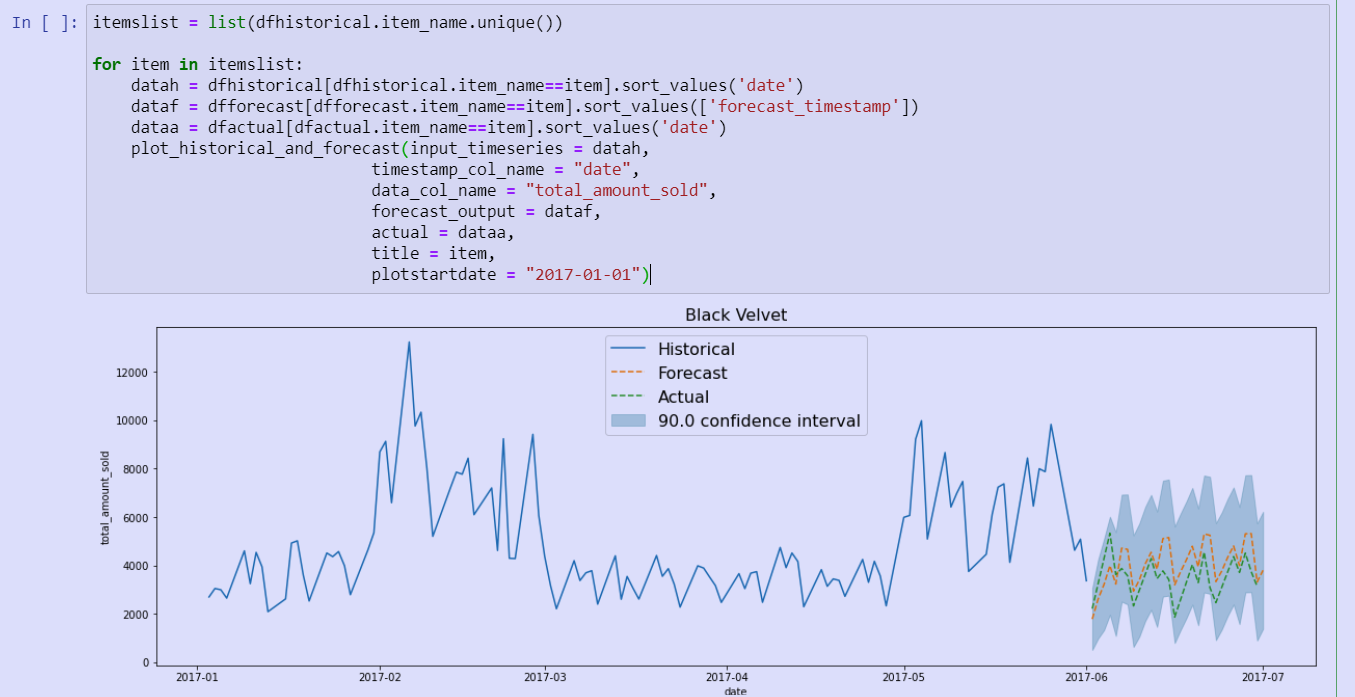

##### Mas com essa formatação mais ou menos

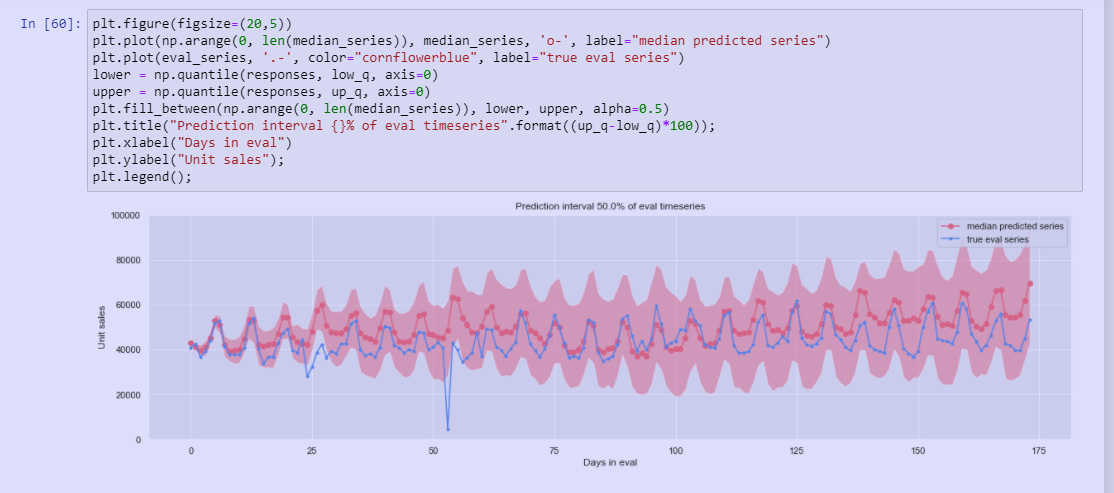

<hr>

<hr>

## Cross-validation for time series

**A brief theorist**

A more sophisticated version of training/test sets is time series cross-validation. In this procedure, there are a series of test sets, each consisting of a single observation. The corresponding training set consists only of observations that occurred prior to the observation that forms the test set. Thus, no future observations can be used in constructing the forecast. Since it is not possible to obtain a reliable forecast based on a small training set, the earliest observations are not considered as test sets.

The following diagram illustrates the series of training and test sets, where the blue observations form the training sets, and the orange observations form the test sets.

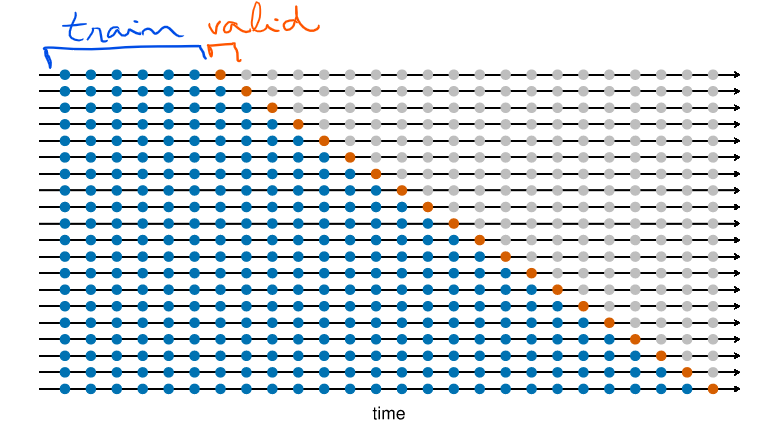

The forecast accuracy is computed by averaging over the test sets. This procedure is sometimes known as [“evaluation on a rolling forecasting origin”](https://otexts.com/fpp3/tscv.html) because the “origin” at which the forecast is based rolls forward in time.

With time series forecasting, one-step forecasts may not be as relevant as multi-step forecasts. In this case, the cross-validation procedure based on a rolling forecasting origin can be modified to allow multi-step errors to be used. Suppose that we are interested in models that produce good  
4
 -step-ahead forecasts. Then the corresponding diagram is shown below.

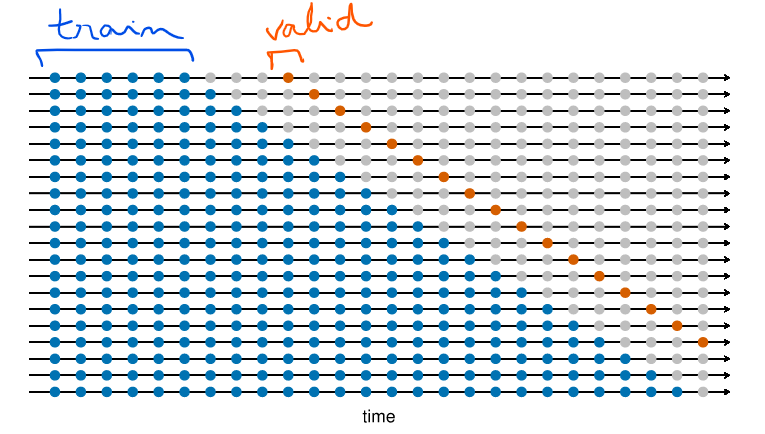

# Modeling<a id="ch6"></a>

**Forecasting for the next 6 weeks for the first store.**

**I. Facebook's Prophet** (work in progress)

[Prophet](https://facebook.github.io/prophet/) is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

**II. Autoregressive Integrated Moving Average (ARIMA)** (to do)

In statistics and econometrics, and in particular in time series analysis, an [autoregressive integrated moving average](https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average) (ARIMA) model is a generalization of an autoregressive moving average (ARMA) model. Both of these models are fitted to time series data either to better understand the data or to predict future points in the series (forecasting).

**III. Recurrent Neural Long Short Term Memory Networks (LSTM)** (to do)

[Long Short Term Memory networks](http://colah.github.io/posts/2015-08-Understanding-LSTMs/) – usually just called “LSTMs” – are a special kind of RNN, capable of learning long-term dependencies. They were introduced by Hochreiter & Schmidhuber (1997), and were refined and popularized by many people in following work.1 They work tremendously well on a large variety of problems, and are now widely used.

**IV. The Fast Fourier Transform (FFT)** (to do)

A fast [Fourier transform (FFT)](https://en.wikipedia.org/wiki/Fast_Fourier_transform) is an algorithm that computes the discrete Fourier transform (DFT) of a sequence, or its inverse (IDFT). Fourier analysis converts a signal from its original domain (often time or space) to a representation in the frequency domain and vice versa

## Facebook's Prophet <a id="ch6.1"></a>

[Prophet](https://facebook.github.io/prophet/) is a decomposable time series model with 3 main model components and one error term:

$$y(t) = g(t) + s(t) + h(t) + \epsilon_{t}$$

* trend g(t) - non-periodic changes of the value
* seasonality s(t) - periodic changes (e.g. weekly and yearly) 
* holidays h(t) - effect of holidays (e.g. irregular patterns over one or more days)
* $\epsilon_{t}$ - error term that describes any idiosyncratic changes (assumed to be normally distributed)

**Uncertainty estimates**

By default it returns uncertainty intervals of the predicted value $y_{hat}$ consisting of three different sources:
* uncertainty in the trend,
* uncertainty in the seasonality estimates,
* additional observation noise

To compute the uncertainty in the trend it is assumed that the average frequency and magnitude of trend changes will be the same in the future as observed in the history. This trend changes are projected forward into the future and by computing their distribution uncertainty intervals are obtained. **By default Prophet only returns uncertainty in the trend and observation noise!**

**Import library**

In [ ]:
from fbprophet import Prophet

**Necessary modifications unique to this package**

In [ ]:
### modify params for prophet predict
sales_prophet = train_store.loc[:, ['Date', 'Sales']]

### reverse to the order: from 2013 to 2015
sales_prophet = sales_prophet.sort_index(ascending = False)

# from the prophet documentation every variables should have specific names
sales_prophet = sales_prophet.rename(columns = {'Date': 'ds',
                                'Sales': 'y'})
sales_prophet.head()

In [ ]:
### creating a function to forecast the sales just for one single store
### Renaming the columns
### Date: ds
### Sales: y

def sales_prediction(store_id, sales_df, periods):
    sales_df = sales_df[sales_df['Store'] == store_id]
    sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales': 'y'})
    sales_df = sales_df.sort_values(by = 'ds')
    
    return sales_df

In [ ]:
df = sales_prediction(56, train_store, 42)
df.tail()

In [ ]:
def sales_prediction(store_id, sales_df, periods):
    sales_df = sales_df[sales_df['Store'] == store_id]
    sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales': 'y'})
    sales_df = sales_df.sort_values(by = 'ds')
    
    model = Prophet(yearly_seasonality=True, daily_seasonality=True)
    model.fit(sales_df)    
    future = model.make_future_dataframe(periods = periods)
    forecast = model.predict(future)
    figure1 = model.plot(forecast, xlabel = 'Data', ylabel = 'Vendas')
    figure2 = model.plot_components(forecast) 
    
    return sales_df, forecast

In [ ]:
df_origin, df_prediction = sales_prediction(56, train_store, 42)

In [ ]:
### submission data set predictions
df_prediction.tail(42).to_csv('yhat_forecast_sales.csv')

In [ ]:
timeseries = sales_prophet[['y']].values
type(timeseries)

In [ ]:
len(timeseries)

As we are asked to predict a time window of 28 days, the easiest way to go now is to use the last 28 days for validation: 

In [ ]:
train_timeseries = timeseries[844200:-28]
eval_timeseries = timeseries[-28::]
print(len(train_timeseries), len(eval_timeseries))
days = np.arange(1, len(timeseries)+1)

In [ ]:
plt.figure(figsize=(20,7))
plt.plot(days[844200:-28], train_timeseries, label="train",  color="cornflowerblue")
plt.plot(days[-28::], eval_timeseries, label="validation", color="orange")
plt.title("Sales");
plt.legend()
plt.xlabel("Day")
plt.ylabel("Unit sales");

## Autoregressive Integrated Moving Average (ARIMA)

<center> << coming soon >> </center>

##  Long Short Term Memory Networks (LSTM)

<center> << coming soon >> </center>

**Imports**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

In [ ]:
class MyLSTM(nn.Module):
    
    def __init__(self, input_dim, hidden_dim, batch_size, num_layers=1, output_dim=1):
        super().__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.batch_size = batch_size
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(input_size=self.input_dim,
                            hidden_size=self.hidden_dim,
                            num_layers=self.num_layers,
                            dropout = 0.25)
        self.linear = nn.Linear(self.hidden_dim, output_dim)
        
    def init_hidden(self):
        self.h_zero = torch.zeros(self.num_layers, self.batch_size, self.hidden_dim).to(device)
        self.c_zero = torch.zeros(self.num_layers, self.batch_size, self.hidden_dim).to(device)
    
    def forward(self, x):
        lstm_output, (h_n, c_n) = self.lstm(x.view(len(x), self.batch_size, -1),
                                           (self.h_zero, self.c_zero))
        last_time_step = lstm_output.view(self.batch_size, len(x), self.hidden_dim)[-1]
        pred = self.linear(last_time_step)
        return pred
    

def train_model(model, data_dict, lr=1e-4, num_epochs=500):
    
    loss_fun = torch.nn.MSELoss(reduction="mean")
    optimiser = torch.optim.Adam(model.parameters(), lr=lr)
    
    train_losses = np.zeros(num_epochs)
    phases = ["train", "eval"]
    losses_dict = {"train": [], "eval": []}
    predictions_dict = {"train": [], "eval": [] }
    
    for n in range(num_epochs):
        
        for phase in phases:
            
            x = data_dict[phase]["input"].to(device, dtype=torch.float)
            y = data_dict[phase]["target"].to(device, dtype=torch.float)
            
            if phase == "train":
                model.train()
            else:
                model.eval()
        
            optimiser.zero_grad()
            
            model.init_hidden()
            y_pred = model(x)
            
            if n == (num_epochs-1):
                predictions_dict[phase] = y_pred.float().cpu().detach().numpy()
            
            loss = loss_fun(y_pred.float(), y)
            losses_dict[phase].append(loss.item())
            
            if n % 50 == 0:
                print("{} loss: {}".format(phase, loss.item()))
            
            if phase == 'train':
                loss.backward()
                optimiser.step()
        
    return losses_dict, predictions_dict

def create_sequences(timeseries, seq_len):
    inputs = []
    targets = []
    
    max_steps = len(timeseries) - (seq_len+1)
    
    for t in range(max_steps):
        x = timeseries[t:(t+seq_len)]
        y = timeseries[t+seq_len]
        inputs.append(x)
        targets.append(y)
    
    return np.array(inputs), np.array(targets)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## The Fast Fourier Transform (FFT)

<center> << coming soon >> </center>

# Feature Selection <a id="ch7"></a>

<center> << coming soon >> </center>

# Evaluation <a id="ch8"></a>

## Metrics <a id="ch7.1"></a>

### MAPE - Mean Absolute Percentage Error

The [mean absolute percentage error](https://en.wikipedia.org/wiki/Mean_absolute_percentage_error) (MAPE), also known as mean absolute percentage deviation (MAPD), is a measure of prediction accuracy of a forecasting method in statistics. It usually expresses the accuracy as a ratio defined by the formula:

$$\text{MAPE}=\frac{100}{n} \sum^n_{t=1} \left | \frac{A_t - F_t}{A_t} \right |$$

where $A_t$ is the actual value and $F_t$ is the forecast value. Their difference is divided by the actual value $A_t$. The absolute value in this ratio is summed for every forecasted point in time and divided by the number of fitted points $n$.

**Confunsion Matrix**

| | Predicted_0 | Predicted_1|
|-|-|-|
|Actual_0| True Negatives | False Positives|
|Actual_1| False Negatives | True Positives|

**Report**

| Model                  | MAPE     | RMSE    | MAE      |
| ------------------     | -------- | ------- | -------- | 
| Prophet            | ?        | ?       | ?        | 
| ARIMA             | ?        | ?       | ?        | 
| LSTM              | ?        | ?       | ?        |
| FFT              | ?        | ?       | ?        | 

## Baseline <a id="ch7.2"></a>

<center> << coming soon >> </center>

## Interpretability <a id="ch9.1"></a>

<center> << apply shap and/or lime here >> </center>

# Deployment <a id="ch9"></a>

<center> << coming soon >> </center>

# Feedback <a id="ch10"></a>

<center> << This is about what the company should do. Like 'recommendations'.  >> </center>

## Average Selling Price (ASP)

What Is Average Selling Price (ASP)?
The term average selling price (ASP) refers to the price at which a certain class of good or service is typically sold. The average selling price is affected by the type of product and the product life cycle. The ASP is the average selling price of the product across multiple distribution channels, across a product category within a company, or even across the market as a whole.

<center> << wip >> </center>

# References <a id="ch10"></a>

**Business:**
* Stock Analysis: Forecasting Revenue and Growth. https://www.investopedia.com/articles/active-trading/022315/stock-analysis-forecasting-revenue-and-growth.asp
* Absolute Return vs. Relative Return: What's the difference? https://www.investopedia.com/ask/answers/118.asp
* Business Forecasting: Understanding the Basics. https://www.investopedia.com/articles/financial-theory/11/basics-business-forcasting.asp


**Model:**
* Prophet Documentation. https://facebook.github.io/prophet/
* Paper: Taylor SJ, Letham B. 2017. Forecasting at scale. PeerJ Preprints 5:e3190v2 https://doi.org/10.7287/peerj.preprints.3190v2
* The Fast Fourier Transform (FFT). https://bookdown.org/rdpeng/timeseriesbook/the-fast-fourier-transform-fft.html

**Textbook:**
* Forecasting hierarchical or grouped time series. https://otexts.com/fpp2/hierarchical.html
* Time series cross-validation. https://otexts.com/fpp3/tscv.html

## Change Log <a id="ch9.3"></a>

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                        |
| ----------------- | ------- | ------------- | --------------------------------------------------------- |
| 2021-08-10        | 1.0    | Brandon Aguiar | Initial steps                           |
| 2021-08-15        | 1.1    | Brandon Aguiar | First model implementation                        |
| 2021-08-16        | 1.2    | Brandon Aguiar | Evaluation and baseline added             |
| 2021-08-17        | 1.3    | Brandon Aguiar | EDA focused             |
| 2021-08-17        | 1.4   | Brandon Aguiar | Focus on times series development              |
| 2021-08-18        | 1.5   | Brandon Aguiar | Numbers removed from indexes               |

> **Takeaway:** An old joke goes: “What does a data scientist seen when they look at a dataset? A bunch of numbers.” There is more than a little truth in that joke. Visualization is often the key to finding patterns and correlations in your data. While visualization cannot often deliver precise results, it can point you in the right direction to ask better questions and efficiently find value in the data.

<h1 align="center"> © brndnaxr. 2021 <h1/>